# CS 5228


In [2]:
# All Imports
from utils import *
import pandas as pd
import locale
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL,'')
pd.set_option('display.max_columns', None)

In [3]:
# Process Training Data
drop_columns = ['CreateJob','RetainedJob','City','Name','Zip','BankState']

# drop_columns = []

le = generate_labels()

base_dropna = get_data(le=le,type='train', dropna=True, get_dummy=True, feature_split=False, values_only=True,drop_columns=drop_columns)
base_fillna = get_data(le=le,type='train', dropna=False, get_dummy=True, feature_split=False, values_only=True,drop_columns=drop_columns)
feature_dropna = get_data(le=le,type='train', dropna=True, get_dummy=True, feature_split=True, values_only=True,drop_columns=drop_columns)
feature_fillna = get_data(le=le,type='train', dropna=False, get_dummy=True, feature_split=True, values_only=True,drop_columns=drop_columns)

In [36]:
base_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49808 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              49808 non-null  int32  
 1   Bank               49808 non-null  int32  
 2   NAICS              49808 non-null  int32  
 3   ApprovalDate       49808 non-null  int64  
 4   ApprovalFY         49808 non-null  int16  
 5   Term               49808 non-null  int64  
 6   NoEmp              49808 non-null  int64  
 7   FranchiseCode      49808 non-null  int32  
 8   DisbursementDate   49808 non-null  int64  
 9   DisbursementGross  49808 non-null  float32
 10  GrAppv             49808 non-null  float32
 11  SBA_Appv           49808 non-null  float32
 12  ChargeOff          49808 non-null  int64  
 13  NewExist_1         49808 non-null  uint8  
 14  NewExist_2         49808 non-null  uint8  
 15  UrbanRural_0       49808 non-null  uint8  
 16  UrbanRural_1       498

In [4]:
# Process Test Data
feature_test = get_data(le=le,type='test', dropna=False, get_dummy=True, feature_split=True, values_only=True,drop_columns=drop_columns)
base_test = get_data(le=le,type='test', dropna=False, get_dummy=True, feature_split=False, values_only=True,drop_columns=drop_columns)

In [38]:
feature_test.describe(include='all')

,State,Bank,NAICS,ApprovalDate,ApprovalFY,FranchiseCode,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_N,RevLineCr_Y,LowDoc_N,LowDoc_Y,NoEmp_Micro,NoEmp_Small,NoEmp_Medium,NoEmp_Large,Term_Short,Term_Intermediate,Term_Long,Term_Extra Long
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,24.311220,1872.726350,421790.956760,1.023636e+09,2002.426590,2595.417730,1.033001e+09,1.750579e+05,1.647051e+05,1.244969e+05,0.708940,0.289900,0.275280,0.60408,0.12064,0.737600,0.262400,0.89246,0.099440,0.762720,0.210320,0.025850,0.001110,0.052240,0.12843,0.786920,0.032410
std,15.134917,1325.081943,250716.950871,1.877301e+08,6.208961,12362.965686,1.865782e+08,2.691642e+05,2.652480e+05,2.096262e+05,0.454253,0.453718,0.446657,0.48905,0.32571,0.439941,0.439941,0.30980,0.299253,0.425417,0.407538,0.158688,0.033298,0.222512,0.33457,0.409486,0.177087
min,0.000000,0.000000,0.000000,-5.978880e+07,1968.000000,0.000000,-5.641920e+07,0.000000e+00,4.000000e+02,2.000000e+02,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,574.000000,238220.000000,9.125568e+08,1999.000000,0.000000,9.254304e+08,3.500000e+04,2.500000e+04,1.600000e+04,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,24.000000,1892.500000,448210.000000,1.085443e+09,2004.000000,0.000000,1.093910e+09,8.100000e+04,6.500000e+04,4.300000e+04,1.000000,0.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,37.000000,3017.000000,561790.000000,1.159942e+09,2007.000000,0.000000,1.164845e+09,1.940000e+05,1.750000e+05,1.330000e+05,1.000000,1.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,51.000000,4015.000000,928120.000000,1.399853e+09,2017.000000,91350.000000,1.483229e+09,8.995000e+06,5.000000e+06,4.500000e+06,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
feature_test.head()

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,CreateJob,RetainedJob,FranchiseCode,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_N,RevLineCr_Y,LowDoc_N,LowDoc_Y,NoEmp_Micro,NoEmp_Small,NoEmp_Medium,NoEmp_Large,Term_Short,Term_Intermediate,Term_Long,Term_Extra Long
0,19510,1344,35,11209,312,28,445110,1134604800,2006.0,0,6,0,1135987200,120000.0,100000.0,50000.0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0
1,119715,5077,4,85297,2137,41,722211,1051747200,2003.0,0,0,78760,1056931200,130000.0,130000.0,110500.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
2,104,6800,44,77450,291,35,423120,1161043200,2007.0,1,1,407,1167523200,184000.0,184000.0,138000.0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
3,34680,6635,18,40337,1033,18,447110,973641600,2001.0,0,0,0,988588800,80000.0,135000.0,101250.0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
4,125633,14103,36,44087,651,47,722110,1130371200,2006.0,1,9,0,1135987200,50000.0,50000.0,25000.0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0


In [7]:
model_names = ['KNN', 'LR', 'DT', 'RF', 'GBM']
base_dropna_f1 = []
base_dropna_acc = []
base_fillna_f1 = []
base_fillna_acc = []
feature_dropna_f1 = []
feature_dropna_acc = []
feature_fillna_f1 = []
feature_fillna_acc = []

def calculate_acc_and_f1(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    return f1, acc

    
def train_single_classifier(classifier, df_in, f1_list, acc_list):
    df_x = df_in.drop(columns='ChargeOff')
    df_y = df_in['ChargeOff']
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state=0)
    f1, acc = calculate_acc_and_f1(classifier, x_train, y_train, x_test, y_test)
    f1_list.append(f1)
    acc_list.append(acc)
    

def train_model(df_in, f1_list, acc_list):
    train_single_classifier(KNeighborsClassifier(), df_in, f1_list, acc_list)
    train_single_classifier(LogisticRegression(), df_in, f1_list, acc_list)
    train_single_classifier(DecisionTreeClassifier(), df_in, f1_list, acc_list)
    train_single_classifier(RandomForestClassifier(), df_in, f1_list, acc_list)
    train_single_classifier(GradientBoostingClassifier(), df_in, f1_list, acc_list)
    

train_model(base_dropna, base_dropna_f1, base_dropna_acc)
train_model(base_fillna, base_fillna_f1, base_fillna_acc)
train_model(feature_dropna, feature_dropna_f1, feature_dropna_acc)
train_model(feature_fillna, feature_fillna_f1, feature_fillna_acc)


In [8]:
accuracy_record = pd.DataFrame({'Model': model_names, 'base_dropna_acc': base_dropna_acc, 'base_fillna_acc': base_fillna_acc, 'feature_dropna_acc': feature_dropna_acc, 'feature_fillna_acc': feature_fillna_acc})
# accuracy_record = pd.DataFrame({'Model': model_names, 'base_dropna_acc': base_dropna_acc, 'feature_dropna_acc': feature_dropna_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'base_dropna_f1': base_dropna_f1, 'base_fillna_f1': base_fillna_f1, 'feature_dropna_f1': feature_dropna_f1, 'feature_fillna_f1': feature_fillna_f1})
# F1_record = pd.DataFrame({'Model': model_names, 'base_dropna_f1': base_dropna_f1, 'feature_dropna_f1': feature_dropna_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

       base_dropna_acc  base_fillna_acc  feature_dropna_acc  \
Model                                                         
KNN              68.50           68.460              68.500   
LR               63.76           61.220              63.750   
DT               87.78           87.260              71.790   
RF               90.21           89.850              79.510   
GBM              90.10           89.590              77.680   
avg              80.07           79.276              72.246   

       feature_fillna_acc  acc_mean  
Model                                
KNN                68.460    68.480  
LR                 61.220    62.490  
DT                 71.830    79.670  
RF                 78.950    84.630  
GBM                77.870    83.810  
avg                71.666    75.816  


       base_dropna_f1  base_fillna_f1  feature_dropna_f1  feature_fillna_f1  \
Model                                                                         
KNN            68.490          

In [10]:
model = GradientBoostingClassifier()
base_dropna_x = base_dropna.drop(columns='ChargeOff')
base_dropna_y = base_dropna['ChargeOff']
model.fit(base_dropna_x, base_dropna_y)
test_pred = model.predict(base_test)
pd.DataFrame(test_pred).to_csv('y_pred.csv',header=['ChargeOff'],index_label="Id")



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(base_dropna_x, base_dropna_y, test_size = 0.25, random_state=0)


clf = GradientBoostingClassifier()
# c = np.append(np.logspace(0, 4, 20),[0.001,.009,0.01,.09,1,5,10,25,100])
# param_grid = {'loss': ['deviance', 'exponential'],
#               'learning_rate': [0.001,0.05,0.1,0.2,0.5],
#               'n_estimators':[50,100,200,500,1000],
#               'subsample':[0.9,1],
#               'criterion':['friedman_mse', 'mse', 'mae'],
#               'min_samples_split':[2,5,10]
#              }

param_grid = {'loss': ['deviance', 'exponential'],
              'learning_rate': [0.05,0.1,0.3],
              'n_estimators':[50,100,150],
              'subsample':[0.9,1],
              'criterion':['friedman_mse', 'mse', 'mae'],
#               'min_samples_split':[2,5],
#               'max_depth':[3,5,7],
#               'max_features':['sqrt','log2', None],
              
             }
print('param_grid: \n',param_grid)

lr_cv = GridSearchCV(clf, param_grid,scoring = 'accuracy',verbose=10,n_jobs=-1)
lr_cv.fit(x_train, y_train)

#Predict values based on new parameters
# y_pred_acc = lr_cv.predict(x_test)

print("Best Parameters",lr_cv.best_params_)
print("Best Accuracy :",lr_cv.best_score_)

y_pred= lr_cv.predict(x_test)
print("Accuracy: ",round(accuracy_score(y_test, y_pred) * 100, 2))
print('Weighted F1 Mesure: ',round(f1_score(y_test, y_pred, average='weighted') * 100, 2))



param_grid: 
 {'loss': ['deviance', 'exponential'], 'learning_rate': [0.05, 0.1, 0.3], 'n_estimators': [50, 100, 150], 'subsample': [0.9, 1], 'criterion': ['friedman_mse', 'mse', 'mae']}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4

In [ ]:
test_pred = lr_cv.predict(base_test)
pd.DataFrame(test_pred).to_csv('y_pred_grid_search.csv',header=['ChargeOff'],index_label="Id")

In [9]:
model = create_model(False)

In [40]:
x_train.head()

,State,Bank,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,FranchiseCode,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_N,RevLineCr_Y,LowDoc_N,LowDoc_Y
1524,1,1603,621210,700358400,1992,180,5,0,720489600,660000.0,660000.0,528000.0,1,0,1,0,0,1,0,1,0
2282,5,1036,447110,1007683200,2002,300,3,0,1009756800,672000.0,672000.0,504000.0,1,0,0,1,0,1,0,1,0
42924,45,2218,423990,1149552000,2006,56,2,0,1151625600,24803.0,25000.0,12500.0,1,0,0,1,0,1,0,1,0
34293,29,3332,812320,691891200,1992,60,5,0,696816000,27000.0,27000.0,24300.0,1,0,1,0,0,1,0,1,0
47616,5,312,334611,1172102400,2007,65,3,0,1175299200,39000.0,35000.0,17500.0,1,0,0,1,0,0,1,1,0


In [53]:
# MLP
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_x = MinMaxScaler()
base_dropna_x = base_dropna.drop(columns='ChargeOff')
base_dropna_y = base_dropna['ChargeOff']
base_dropna_scaled_x = min_max_scaler_x.fit_transform(base_dropna_x.to_numpy())
base_dropna_normalized_x = pd.DataFrame(base_dropna_scaled_x)

x_train, x_val, y_train, y_val = train_test_split(base_dropna_normalized_x, base_dropna_y, test_size = 0.25, random_state=0)
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(16,8,4), learning_rate_init=0.01, solver='adam', verbose=True).fit(base_dropna_normalized_x, base_dropna_y)

Iteration 1, loss = 0.53505702
Iteration 2, loss = 0.46601350
Iteration 3, loss = 0.45480825
Iteration 4, loss = 0.44054997
Iteration 5, loss = 0.43225320
Iteration 6, loss = 0.42949949
Iteration 7, loss = 0.42392469
Iteration 8, loss = 0.42155817
Iteration 9, loss = 0.42111155
Iteration 10, loss = 0.41623220
Iteration 11, loss = 0.41380127
Iteration 12, loss = 0.41418075
Iteration 13, loss = 0.40878194
Iteration 14, loss = 0.41094082
Iteration 15, loss = 0.40826696
Iteration 16, loss = 0.40716668
Iteration 17, loss = 0.40606232
Iteration 18, loss = 0.40228043
Iteration 19, loss = 0.40357506
Iteration 20, loss = 0.39837777
Iteration 21, loss = 0.39593674
Iteration 22, loss = 0.39567324
Iteration 23, loss = 0.39461901
Iteration 24, loss = 0.39600672
Iteration 25, loss = 0.39008423
Iteration 26, loss = 0.39190441
Iteration 27, loss = 0.38710242
Iteration 28, loss = 0.38897809
Iteration 29, loss = 0.38753347
Iteration 30, loss = 0.38595089
Iteration 31, loss = 0.38941013
Iteration 32, los

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_x = MinMaxScaler()
base_dropna_x = base_dropna.drop(columns='ChargeOff')
base_dropna_y = base_dropna['ChargeOff']
base_dropna_scaled_x = min_max_scaler_x.fit_transform(base_dropna_x.to_numpy())
base_dropna_normalized_x = pd.DataFrame(base_dropna_scaled_x)

x_train, x_val, y_train, y_val = train_test_split(base_dropna_normalized_x, base_dropna_y, test_size = 0.25, random_state=0)

In [54]:
y_val_pred = clf.predict(x_val)
f1 = round(f1_score(y_val, y_val_pred, average='weighted') * 100, 2)
acc = round(accuracy_score(y_val, y_val_pred) * 100, 2)
print("f1: {}, acc: {}".format(f1, acc))

f1: 85.28, acc: 85.29


In [23]:
x_train = x_train.to_numpy().reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.to_numpy().reshape((x_val.shape[0], 1, x_val.shape[1]))
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [27]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.003),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               76800     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 85,121
Trainable params: 85,121
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train, epochs=300, batch_size=128, validation_data=(x_val, y_val), verbose=2, shuffle=True)

Train on 37356 samples, validate on 12452 samples
Epoch 1/300
37356/37356 - 2s - loss: 0.1766 - accuracy: 0.7442 - val_loss: 0.1548 - val_accuracy: 0.7767
Epoch 2/300
37356/37356 - 1s - loss: 0.1481 - accuracy: 0.7966 - val_loss: 0.1454 - val_accuracy: 0.8016
Epoch 3/300
37356/37356 - 1s - loss: 0.1425 - accuracy: 0.8063 - val_loss: 0.1369 - val_accuracy: 0.8183
Epoch 4/300
37356/37356 - 1s - loss: 0.1390 - accuracy: 0.8089 - val_loss: 0.1353 - val_accuracy: 0.8179
Epoch 5/300
37356/37356 - 1s - loss: 0.1367 - accuracy: 0.8139 - val_loss: 0.1332 - val_accuracy: 0.8244
Epoch 6/300
37356/37356 - 1s - loss: 0.1338 - accuracy: 0.8170 - val_loss: 0.1327 - val_accuracy: 0.8211
Epoch 7/300
37356/37356 - 1s - loss: 0.1320 - accuracy: 0.8197 - val_loss: 0.1301 - val_accuracy: 0.8232
Epoch 8/300
37356/37356 - 1s - loss: 0.1295 - accuracy: 0.8216 - val_loss: 0.1336 - val_accuracy: 0.8144
Epoch 9/300
37356/37356 - 1s - loss: 0.1288 - accuracy: 0.8235 - val_loss: 0.1270 - val_accuracy: 0.8290
Epoch

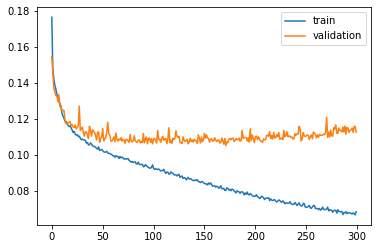

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()